Lineplots: Completed <br/>
Laks Map: Incomplete

2021-06-08 <br/>
Great Lakes Fish <br/>
https://github.com/rfordatascience/tidytuesday/tree/master/data/2021

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('fishing.csv')

In [3]:
df['revenue']=df['grand_total']*df['values']

In [4]:
df.head(10)

,year,lake,species,grand_total,comments,region,values,revenue
0,1991,Erie,American Eel,1.0,NaN,Michigan (MI),0.0,0.0
1,1991,Erie,American Eel,1.0,NaN,New York (NY),0.0,0.0
2,1991,Erie,American Eel,1.0,NaN,Ohio (OH),0.0,0.0
3,1991,Erie,American Eel,1.0,NaN,Pennsylvania (PA),0.0,0.0
4,1991,Erie,American Eel,1.0,NaN,U.S. Total,0.0,0.0
5,1991,Erie,American Eel,1.0,NaN,Canada (ONT),1.0,1.0
6,1992,Erie,American Eel,0.0,NaN,Michigan (MI),0.0,0.0
7,1992,Erie,American Eel,0.0,NaN,New York (NY),0.0,0.0
8,1992,Erie,American Eel,0.0,NaN,Ohio (OH),0.0,0.0
9,1992,Erie,American Eel,0.0,NaN,Pennsylvania (PA),0.0,0.0


In [5]:
a=df.groupby('year').sum().reset_index()

<AxesSubplot:xlabel='year'>

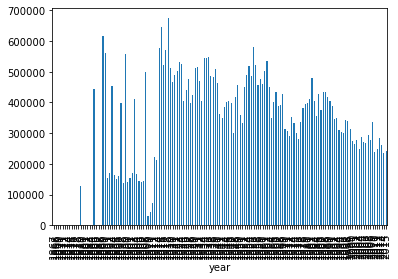

In [6]:
df.groupby('year')['grand_total'].agg('sum').plot(kind='bar')

In [7]:
a.head()

,year,grand_total,values,revenue
0,1867,0.0,6475.0,0.0
1,1868,0.0,6427.0,0.0
2,1869,0.0,5337.0,0.0
3,1870,0.0,6741.0,0.0
4,1871,0.0,5382.0,0.0


In [8]:
type(a)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='year', ylabel='values'>

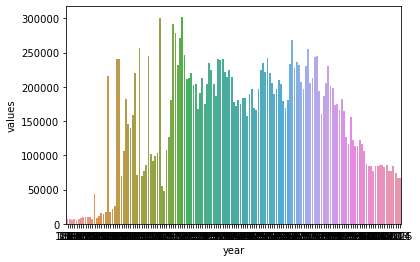

In [9]:
sns.barplot(data=a,x='year',y='values')

In [10]:
b=df.groupby('species')['values'].agg('sum').reset_index().sort_values(by=['values'], ascending=False)

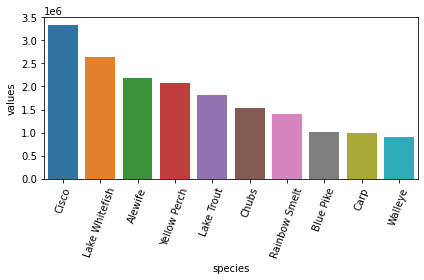

In [11]:
sns.barplot(data=b[:10],x='species',y='values')
plt.xticks(rotation=70)
plt.tight_layout()

In [12]:
c=df.groupby(['year','region'])['values'].agg('sum').reset_index()

In [13]:
d= c[(c['region']=='Total Canada (ONT)') | (c['region']=='U.S. Total')]

In [14]:
d.head()

,year,region,values
9,1867,Total Canada (ONT),3548.0
12,1867,U.S. Total,0.0
25,1868,Total Canada (ONT),3053.0
28,1868,U.S. Total,0.0
41,1869,Total Canada (ONT),3153.0


<AxesSubplot:xlabel='year', ylabel='values'>

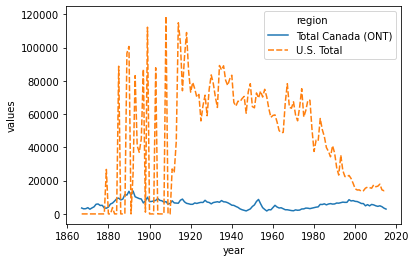

In [15]:
sns.lineplot(data=d, x="year", y="values", hue="region", style="region")

In [16]:
# Template


import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()